# Using CyTargetLinker for a WikiPathway

Applications that were used: Cytoscape (v.3.8.2) and Jupyter Notebooks (v.2.2.6) through the Anaconda navigator (v.1.10.0).

In Cytoscape, the following apps were installed: CyTargetlinker (v.4.1.0), WikiPathways (v.3.3.7) and FileTransfer (v.1.1) for communication to Jupyter notebooks. 
To install apps in Cytoscape go to Apps -> App Manager -> Search

For those new to working with Jupyter Notebooks, go to the [MarkDown Tutorial](https://www.markdowntutorial.com/lesson/1/) to learn how to comment your code properly. 

Now let's move on to the code. 

#### Here we will walk through extending a pathway using various linksets. 

## Step 1a: Importing required packages

In [1]:
import os
import py4cytoscape as p4c
import sys
import requests
import pandas as pd
from lxml import etree as ET
from collections import OrderedDict

## Step 1b: Load code that prevents unwanted logging error

In [2]:
from logging import getLogger, INFO
from concurrent_log_handler import ConcurrentRotatingFileHandler

In [3]:
log = getLogger()
# Use an absolute path to prevent file rotation trouble.
logfile = os.path.abspath("py4cytoscape.log")
# Rotate log after reaching 512K, keep 5 old copies.
rotateHandler = ConcurrentRotatingFileHandler(logfile, "a", 512*1024, 5)
log.addHandler(rotateHandler)
log.setLevel(INFO)

log.info("Here is a very exciting log message, just for you")

Check py4cytoscape version

In [4]:
p4c.cytoscape_version_info()

{'apiVersion': 'v1',
 'cytoscapeVersion': '3.8.2',
 'automationAPIVersion': '1.2.0',
 'py4cytoscapeVersion': '0.0.9'}

## Step 2a: Defining the Pathway and loading as Network  

You can change the WP_ID variable to a desired WikiPathways ID. Note we use the 'import-as-network' option. 

In [5]:
WP_ID = 'WP5035'

In [6]:
cmd_list = ['wikipathways','import-as-network','id="', WP_ID,'"']
cmd = " ".join(cmd_list)
p4c.commands.commands_get(cmd)

[]

## Step 2b: Viewing our output in Jupyter 
To view our output in Jupyter, we load an image. 

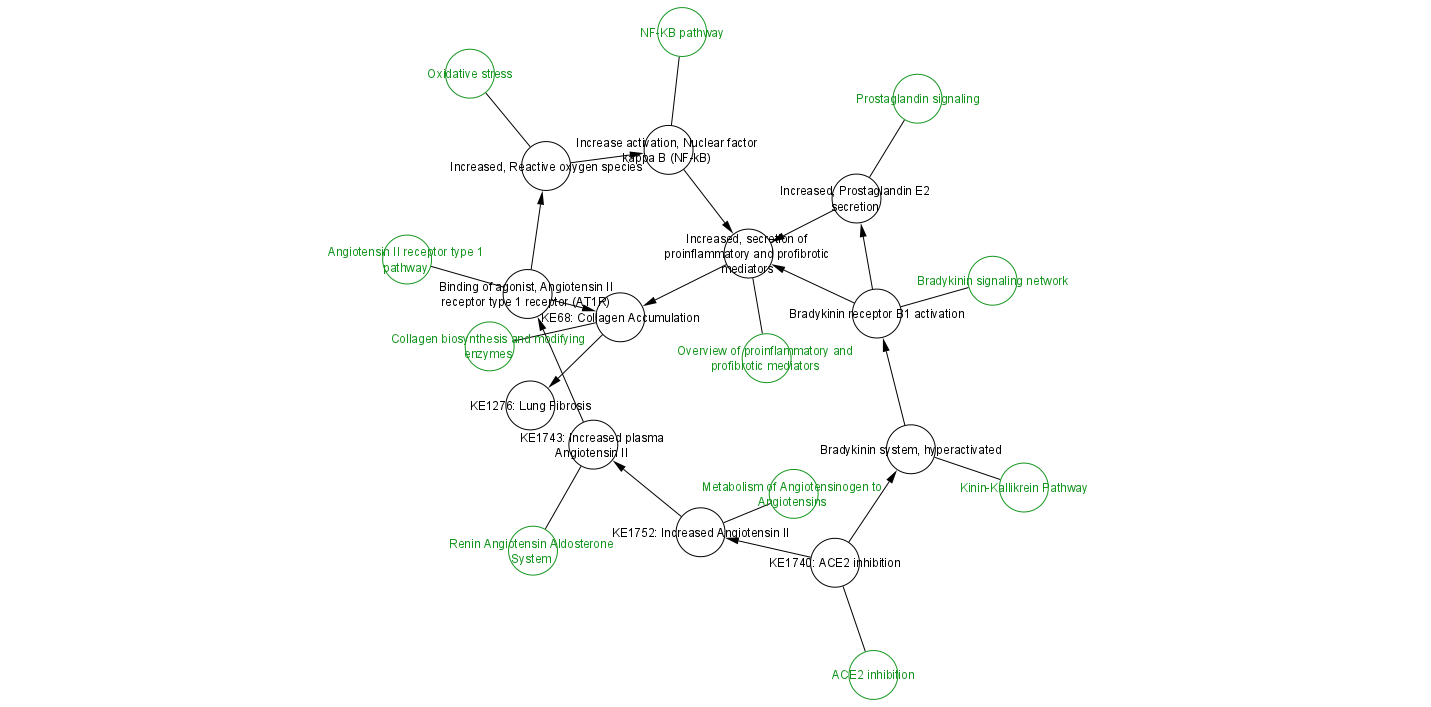

In [7]:
p4c.export_image(filename='loaded_network.png')
p4c.sandbox_get_from('loaded_network.png')
from IPython.display import Image

p4c.export_image(filename='loaded_network.svg', type='SVG')
p4c.sandbox_get_from('loaded_network.svg')

Image('loaded_network.png')

## Step 3a: Extending the network   

For this we use the CyTargetLinker App on Cytoscape as well as (a) CyTargetLinker Linkset(s).

It is possible that loading different linkset in specific orders can cause problems. If any problems do occur, change the order of the linksets that are loaded. 

In [8]:
path = 'C:/Users/stefa/Documents/GitHub/2021-internship/Raats/'

linkset = path + 'wikipathways-hsa-20210512-REACTOME.xgmml'

cmd = "".join(['cytargetlinker extend idAttribute="XrefId" linkSetFiles="', linkset, '" network=current direction=TARGETS'])
p4c.commands.commands_get(cmd)

['Extension step: 1',
 'Linkset: WikiPathways-20210512_Homo sapiens_20210512',
 'Added edges: 85',
 'Added nodes: 85']

## Potentially extend with an additional file

In [9]:
linkset2 = path + 'wikipathways-hsa-20210525-STUDENT.xgmml'

cmd = "".join(['cytargetlinker extend idAttribute="XrefId" linkSetFiles="', linkset2, '" network=current direction=TARGETS'])
p4c.commands.commands_get(cmd)

['Extension step: 2',
 'Linkset: WikiPathways-20210512_Homo sapiens_20210512',
 'Added edges: 194',
 'Added nodes: 166']

## Potentially extend with an additional file

In [10]:
linkset2 = path + 'wikipathways-hsa-20210512-WIKIPATHWAYS.xgmml'

cmd = "".join(['cytargetlinker extend idAttribute="XrefId" linkSetFiles="', linkset2, '" network=current direction=TARGETS'])
p4c.commands.commands_get(cmd)

['Extension step: 3',
 'Linkset: WikiPathways-20210512_Homo sapiens_20210512',
 'Added edges: 125',
 'Added nodes: 100']

## Step 3b: Viewing our output in Jupyter

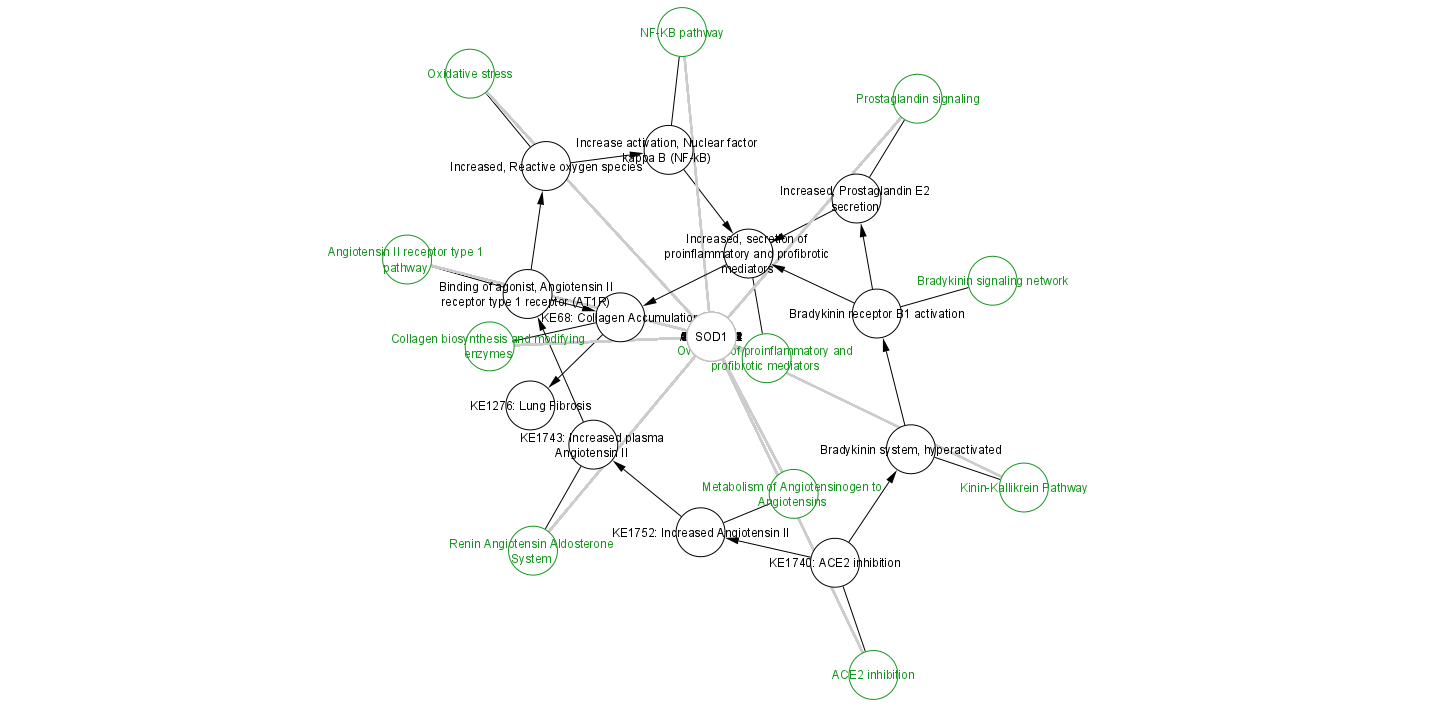

In [11]:
p4c.export_image(filename='ext_net_raw.png')
p4c.sandbox_get_from('ext_net_raw.png')

p4c.export_image(filename='ext_net_raw.svg', type='SVG')
p4c.sandbox_get_from('ext_net_raw.svg')

Image('ext_net_raw.png')

## Step 4a: Loading a visual style

As you can see from the image above, all nodes were added in the same place. This makes it difficult to read our network. Lets fix that!  
First we will need to load a visual style into our session. My visual style is in the same location as my linkset, so I can reuse the 'path' variable. 

In [15]:
vizstyle = path+ "newstyleV1.xml"
LoadStylecmd = "".join(['vizmap load file file="',vizstyle,'"'])
p4c.commands.commands_get(LoadStylecmd)

['Loaded styles:', 'CyTargetLinker_0']

## Step 4b: Applying the visual style to our network

In this step we apply our visual style to our network. We also change the layout of our network to network, to make it easier to view. 

In [16]:
setVisualStyle = 'vizmap apply styles="CyTargetLinker_0"'
p4c.commands.commands_get(setVisualStyle)

['Style applied to views:',
 'CTL_ACE2 inhibition leads to pulmonary fibrosis - Homo sapiens (SUID: 4667)']

In [17]:
p4c.layout_network()

{}

## Step 4c: Viewing our output in Jupyter

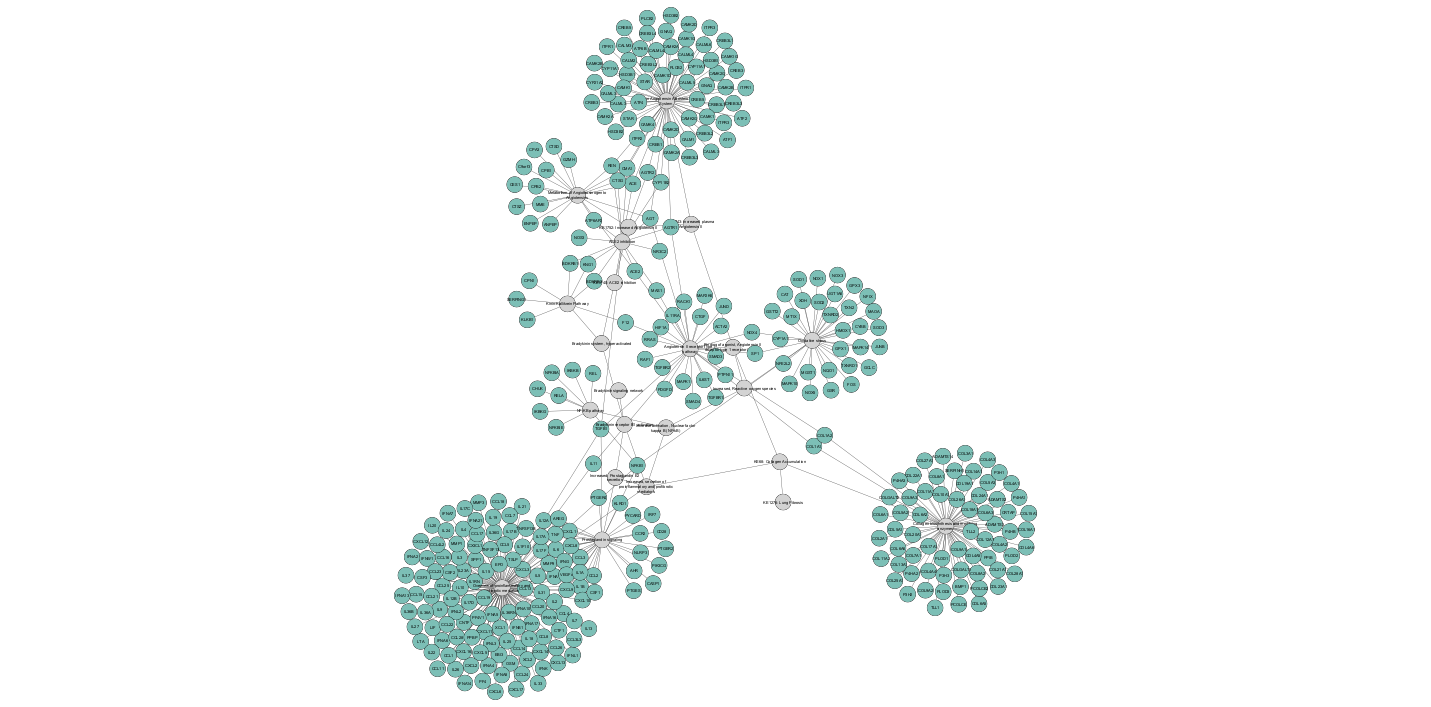

In [18]:
p4c.export_image(filename='ext_net_viz.png')
p4c.sandbox_get_from('ext_net_viz.png')

p4c.export_image(filename='ext_net_viz.svg', type='SVG')
p4c.sandbox_get_from('ext_net_viz.svg')

Image('ext_net_viz.png')